In [1]:
import pandas as pd
import warnings, math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from time import time
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedShuffleSplit
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

df = pd.read_csv("data_ready.csv")

df.head()

,Unnamed: 0,plot,end_of_season_dry_biomass,accumulated_heat_units,lateStage_NGRDI,lateStage_RGBVI,lateStage_GLI,lateStage_VARI,lateStage_RBRGB,lateStage_IPCA,...,reproStage_I1,reproStage_I2,reproStage_normalizedNGRDI,reproStage_normalizedRGBVI,reproStage_normalizedGLI,reproStage_normalizedVARI,reproStage_normalizedRBRGB,reproStage_normalizedIPCA,reproStage_normalizedI1,reproStage_normalizedI2
0,0,PI329480_00,18516.67351,5372,0.007506,0.141349,0.066406,0.013136,0.080398,82.885324,...,44.979054,0.531911,0.039045,0.170804,0.083424,0.065240,0.058162,59.861352,39.499659,0.535321
1,1,PI329480_01,11582.72473,5372,0.002152,0.142623,0.066307,0.004045,0.087887,87.418313,...,44.829644,0.522507,0.037424,0.171036,0.083392,0.062186,0.061029,57.080040,37.715596,0.526175
2,2,PI527045_00,21741.73954,5372,-0.015333,0.119467,0.053594,-0.023625,0.095743,94.986044,...,41.784205,0.504951,0.029108,0.153531,0.074471,0.048770,0.060978,55.712333,37.186159,0.509123
3,3,PI527045_01,10947.22355,5372,-0.006941,0.131985,0.060383,-0.010323,0.092894,87.228825,...,46.215807,0.489000,0.026047,0.155641,0.075154,0.043215,0.066246,59.446443,39.845282,0.492443
4,4,PI562997_00,32515.06412,5372,0.014687,0.170205,0.080237,0.023510,0.088961,101.041731,...,42.996035,0.543296,0.044531,0.178721,0.087579,0.074215,0.057195,58.775120,38.611282,0.548231


In [2]:
corr = df.corr()

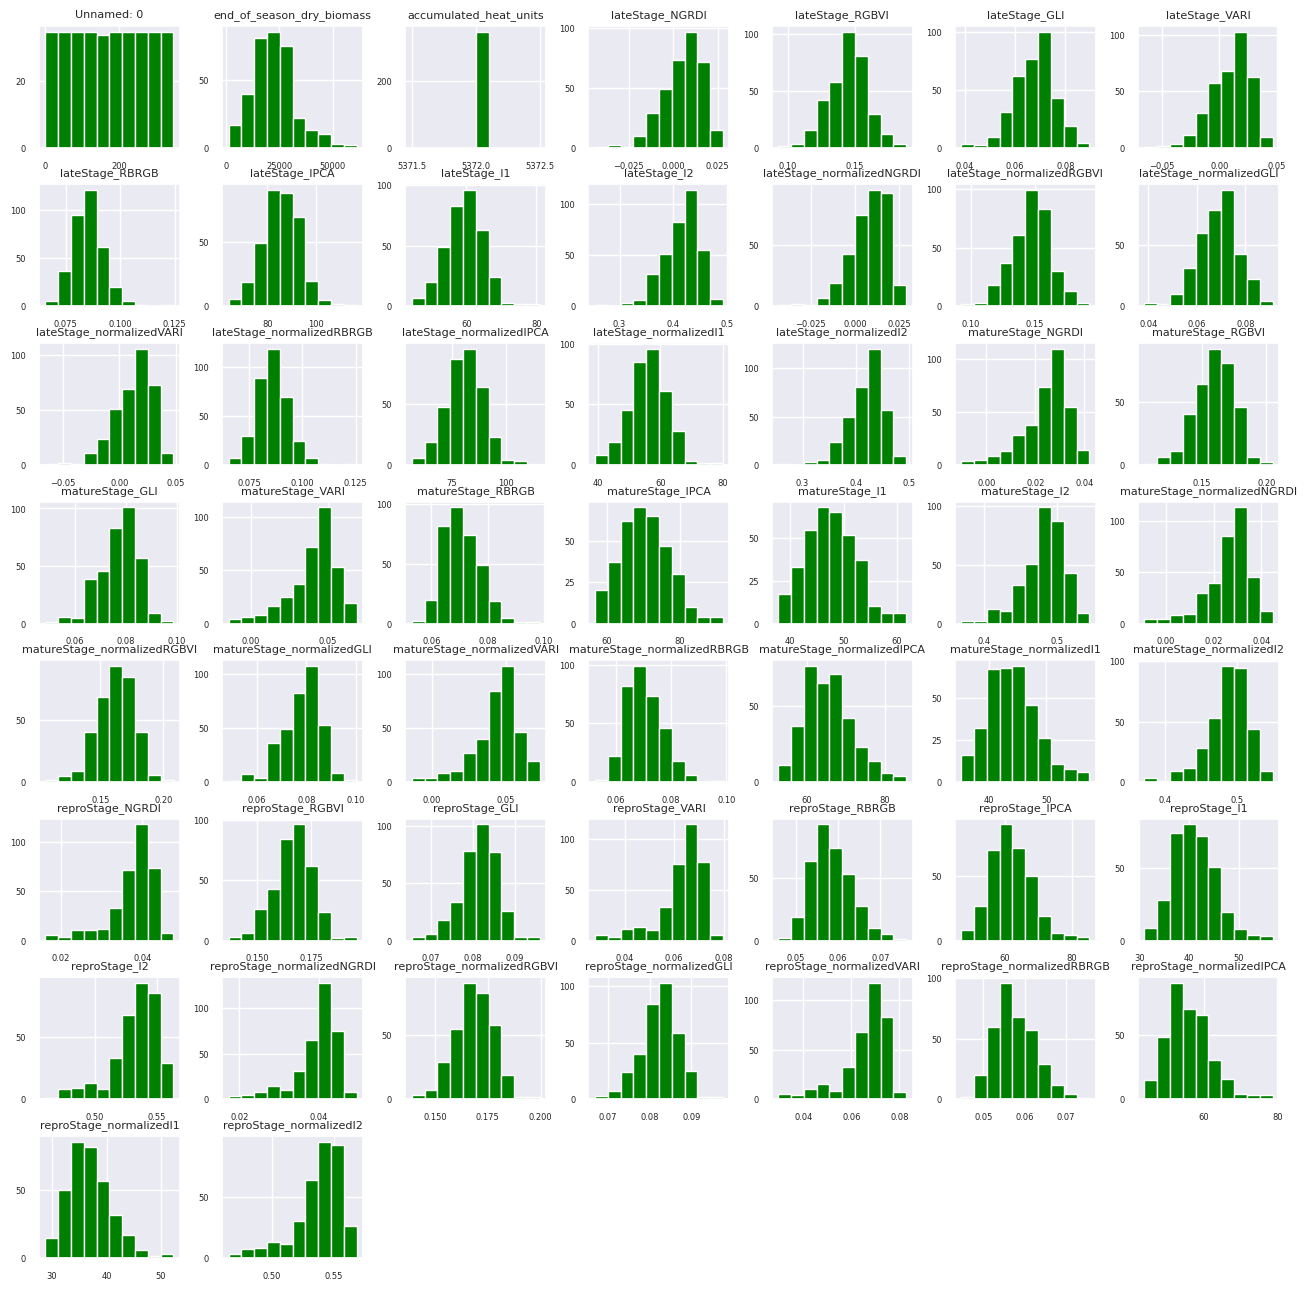

In [3]:
sns.set()
fig = df.hist(figsize=(16,16), color='green', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()

In [4]:
def get_best_features(clf, method, X_train, X_test, y_train, y_test):  
    t0 = time()
    print("benchmark of", method)
    model = GAFeatureSelectionCV(
    estimator=clf,
    population_size=50,
    generations=50,
    n_jobs=-1,
    )
    model.fit(X_train, y_train)
    train_time = time() - t0
    features = model.best_features_
    print("train time :", train_time)
    return features

In [5]:
X = df[[
"accumulated_heat_units",
"lateStage_NGRDI",
"lateStage_RGBVI",
"lateStage_GLI",
"lateStage_VARI",
"lateStage_RBRGB",
"lateStage_IPCA",
"lateStage_I1",
"lateStage_I2",
"matureStage_NGRDI",
"matureStage_RGBVI",
"matureStage_GLI",
"matureStage_VARI",
"matureStage_RBRGB",
"matureStage_IPCA",
"matureStage_I1",
"matureStage_I2",
"reproStage_NGRDI",
"reproStage_RGBVI",
"reproStage_GLI",
"reproStage_VARI",
"reproStage_RBRGB",
"reproStage_IPCA",
"reproStage_I1",
"reproStage_I2",
]]
y = df["end_of_season_dry_biomass"]

In [6]:
X.head()

,accumulated_heat_units,lateStage_NGRDI,lateStage_RGBVI,lateStage_GLI,lateStage_VARI,lateStage_RBRGB,lateStage_IPCA,lateStage_I1,lateStage_I2,matureStage_NGRDI,...,matureStage_I1,matureStage_I2,reproStage_NGRDI,reproStage_RGBVI,reproStage_GLI,reproStage_VARI,reproStage_RBRGB,reproStage_IPCA,reproStage_I1,reproStage_I2
0,5372,0.007506,0.141349,0.066406,0.013136,0.080398,82.885324,57.273975,0.428293,0.028450,...,48.179428,0.492002,0.037755,0.167688,0.081887,0.063235,0.058634,67.670133,44.979054,0.531911
1,5372,0.002152,0.142623,0.066307,0.004045,0.087887,87.418313,60.822384,0.403273,0.022674,...,51.532277,0.467479,0.035932,0.168602,0.082147,0.059897,0.061519,67.254334,44.829644,0.522507
2,5372,-0.015333,0.119467,0.053594,-0.023625,0.095743,94.986044,67.353649,0.354175,0.000581,...,50.458790,0.422541,0.027675,0.152119,0.073747,0.046573,0.061670,62.131933,41.784205,0.504951
3,5372,-0.006941,0.131985,0.060383,-0.010323,0.092894,87.228825,61.286860,0.376250,0.000989,...,47.170312,0.414543,0.024675,0.154329,0.074443,0.041302,0.066838,68.361851,46.215807,0.489000
4,5372,0.014687,0.170205,0.080237,0.023510,0.088961,101.041731,69.412599,0.425360,0.024019,...,51.590679,0.476994,0.042692,0.176830,0.086584,0.071300,0.058135,65.069660,42.996035,0.543296


In [7]:
y.head()

0    18516.67351
1    11582.72473
2    21741.73954
3    10947.22355
4    32515.06412
Name: end_of_season_dry_biomass, dtype: float64

In [8]:
X_train = X.values
y_train = y.values

X_test, y_test = shuffle(X_train, y_train)

In [9]:
lr  = RandomForestRegressor()

features = get_best_features(lr, "linear regression", X_train, X_test, y_train, y_test)
X_train = X_train[:, features]
X_test = X_test[:, features]
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
MAE = mean_absolute_error(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)
print('Coefficients: \n' + str(lr.coef_))
print('Mean squared error: ' + str(MSE))
print('Variance score: ' + str(lr.score(X_test, y_test)))
print('Root Mean squared error: ' + str(math.sqrt(MSE)))
print('Mean Absoulte Error: ' + str(MAE))
print('R_2 Score: ' + str(r_2))

benchmark of linear regression
gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	50    	0.0777167	0.018353   	0.113048   	0.0151931  
1  	100   	0.0959244	0.0151668  	0.131435   	0.0656319  
2  	100   	0.107972 	0.0132173  	0.131435   	0.0711543  
3  	100   	0.114877 	0.00956703 	0.131435   	0.0793716  
4  	100   	0.120262 	0.00540699 	0.131435   	0.1007     
5  	100   	0.124288 	0.00403305 	0.133797   	0.1162     
6  	100   	0.127582 	0.00403072 	0.133797   	0.115313   
7  	100   	0.12993  	0.00570547 	0.133797   	0.0930278  
8  	100   	0.13188  	0.00282341 	0.135014   	0.120217   
9  	100   	0.132991 	0.00191517 	0.138219   	0.123945   
10 	100   	0.133701 	0.00288858 	0.138219   	0.118303   
11 	100   	0.134046 	0.00550899 	0.14484    	0.108751   
12 	100   	0.136104 	0.00247806 	0.14484    	0.129144   
13 	100   	0.137804 	0.00232498 	0.146412   	0.134112   
14 	100   	0.138094 	0.00293516 	0.146412   	0.129142   
15 	100   	0.137544 	0.0041602  	0.146412   	0.115207   


In [10]:

X = df[[
"lateStage_normalizedNGRDI",
"lateStage_normalizedRGBVI",
"lateStage_normalizedGLI",
"lateStage_normalizedVARI",
"lateStage_normalizedRBRGB",
"lateStage_normalizedIPCA",
"lateStage_normalizedI1",
"lateStage_normalizedI2",
"matureStage_normalizedNGRDI",
"matureStage_normalizedRGBVI",
"matureStage_normalizedGLI",
"matureStage_normalizedVARI",
"matureStage_normalizedRBRGB",
"matureStage_normalizedIPCA",
"matureStage_normalizedI1",
"matureStage_normalizedI2",
"reproStage_normalizedNGRDI",
"reproStage_normalizedRGBVI",
"reproStage_normalizedGLI",
"reproStage_normalizedVARI",
"reproStage_normalizedRBRGB",
"reproStage_normalizedIPCA",
"reproStage_normalizedI1",
"reproStage_normalizedI2"
]]
y = df["end_of_season_dry_biomass"]

X_train = X.values
y_train = y.values

X_test, y_test = shuffle(X_train, y_train)

normalized  = RandomForestRegressor()

features = get_best_features(normalized, "linear regression", X_train, X_test, y_train, y_test)
X_train = X_train[:, features]
X_test = X_test[:, features]
normalized.fit(X_train, y_train)
y_pred = normalized.predict(X_test)
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
MAE = mean_absolute_error(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)
print('Coefficients: \n' + str(normalized.coef_))
print('Mean squared error: ' + str(MSE))
print('Variance score: ' + str(normalized.score(X_test, y_test)))
print('Root Mean squared error: ' + str(math.sqrt(MSE)))
print('Mean Absoulte Error: ' + str(MAE))
print('R_2 Score: ' + str(r_2))

benchmark of linear regression
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.182778	0.0438057  	0.244781   	0.0722146  
1  	100   	0.214013	0.0273144  	0.247269   	0.10405    
2  	100   	0.230958	0.0126944  	0.251296   	0.196899   
3  	100   	0.241812	0.00798436 	0.257177   	0.217147   
4  	100   	0.247113	0.00567942 	0.265773   	0.236249   
5  	100   	0.250969	0.00701459 	0.269946   	0.238352   
6  	100   	0.257701	0.00716175 	0.269946   	0.245213   
7  	100   	0.263823	0.00641907 	0.274059   	0.249726   
8  	100   	0.267025	0.00357548 	0.274059   	0.257545   
9  	100   	0.269411	0.00298188 	0.274191   	0.259989   
10 	100   	0.270751	0.00275725 	0.274191   	0.262736   
11 	100   	0.272573	0.00239552 	0.275975   	0.266441   
12 	100   	0.273392	0.00192417 	0.275975   	0.266586   
13 	100   	0.274144	0.00180972 	0.277747   	0.266437   
14 	100   	0.273961	0.00225624 	0.276956   	0.265179   
15 	100   	0.274358	0.00176122 	0.276956   	0.266906   
16 	100   	0.2733

In [11]:

X = df[[
"lateStage_NGRDI",
"lateStage_RGBVI",
"lateStage_GLI",
"lateStage_VARI",
"lateStage_RBRGB",
"lateStage_IPCA",
"lateStage_I1",
"lateStage_I2",
"lateStage_normalizedNGRDI",
"lateStage_normalizedRGBVI",
"lateStage_normalizedGLI",
"lateStage_normalizedVARI",
"lateStage_normalizedRBRGB",
"lateStage_normalizedIPCA",
"lateStage_normalizedI1",
"lateStage_normalizedI2",
"matureStage_NGRDI",
"matureStage_RGBVI",
"matureStage_GLI",
"matureStage_VARI",
"matureStage_RBRGB",
"matureStage_IPCA",
"matureStage_I1",
"matureStage_I2",
"matureStage_normalizedNGRDI",
"matureStage_normalizedRGBVI",
"matureStage_normalizedGLI",
"matureStage_normalizedVARI",
"matureStage_normalizedRBRGB",
"matureStage_normalizedIPCA",
"matureStage_normalizedI1",
"matureStage_normalizedI2",
"reproStage_NGRDI",
"reproStage_RGBVI",
"reproStage_GLI",
"reproStage_VARI",
"reproStage_RBRGB",
"reproStage_IPCA",
"reproStage_I1",
"reproStage_I2",
"reproStage_normalizedNGRDI",
"reproStage_normalizedRGBVI",
"reproStage_normalizedGLI",
"reproStage_normalizedVARI",
"reproStage_normalizedRBRGB",
"reproStage_normalizedIPCA",
"reproStage_normalizedI1",
"reproStage_normalizedI2"
]]
y = df["end_of_season_dry_biomass"]

X_train = X.values
y_train = y.values

X_test, y_test = shuffle(X_train, y_train)

both  = RandomForestRegressor()

features = get_best_features(both, "linear regression", X_train, X_test, y_train, y_test)
X_train = X_train[:, features]
X_test = X_test[:, features]
both.fit(X_train, y_train)
y_pred = both.predict(X_test)
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
MAE = mean_absolute_error(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)
print('Coefficients: \n' + str(both.coef_))
print('Mean squared error: ' + str(MSE))
print('Variance score: ' + str(both.score(X_test, y_test)))
print('Root Mean squared error: ' + str(math.sqrt(MSE)))
print('Mean Absoulte Error: ' + str(MAE))
print('R_2 Score: ' + str(r_2))

benchmark of linear regression
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.202702	0.026323   	0.271789   	0.129761   
1  	100   	0.223878	0.0247468  	0.292522   	0.156612   
2  	100   	0.240551	0.0230402  	0.292522   	0.207074   
3  	100   	0.262154	0.0174348  	0.293959   	0.219604   
4  	100   	0.273168	0.0145136  	0.293959   	0.236078   
5  	100   	0.276911	0.0103449  	0.293959   	0.25756    
6  	100   	0.281726	0.0110584  	0.297979   	0.250175   
7  	100   	0.288631	0.00717939 	0.300372   	0.256013   
8  	100   	0.290787	0.00531417 	0.305044   	0.275967   
9  	100   	0.291965	0.00477563 	0.300372   	0.278157   
10 	100   	0.292387	0.00427133 	0.297979   	0.277101   
11 	100   	0.294328	0.00390158 	0.303201   	0.280606   
12 	100   	0.29691 	0.00295586 	0.305534   	0.293081   
13 	100   	0.296302	0.00590845 	0.305534   	0.272694   
14 	100   	0.298796	0.00448568 	0.305534   	0.281142   
15 	100   	0.300284	0.00591888 	0.305534   	0.272911   
16 	100   	0.3005